In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
# from tensorflow import keras as keras 
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

1.15.0
2.3.1


Using TensorFlow backend.


In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [4]:
# X_train

# Keras

In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history])


Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.4325 - accuracy: 0.7928 - val_loss: 0.3806 - val_accuracy: 0.8090
Epoch 2/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.3769 - accuracy: 0.8122 - val_loss: 0.3742 - val_accuracy: 0.8083
Epoch 3/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.3722 - accuracy: 0.8133 - val_loss: 0.3655 - val_accuracy: 0.8146
Epoch 4/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.3713 - accuracy: 0.8130 - val_loss: 0.3742 - val_accuracy: 0.7884
Epoch 5/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.3709 - accuracy: 0.8134 - val_loss: 0.3775 - val_accuracy: 0.8170
Epoch 6/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.3703 - accuracy: 0.8132 - val_loss: 0.3687 - val_accuracy: 0.8097
Epoch 7/100
30162/30162 [==============================] - 1s

In [8]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

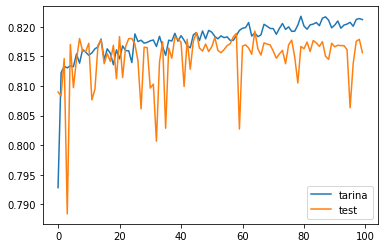

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = "tarina")
plt.plot(history.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

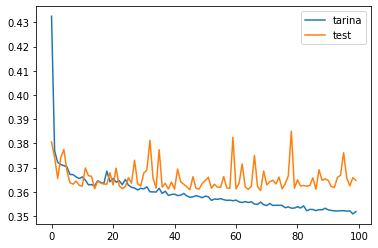

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = "tarina")
plt.plot(history.history['val_loss'], label = "test")
plt.legend()
plt.show()

In [11]:
model.predict(X_test)

array([[3.4630299e-04],
       [1.7408907e-01],
       [5.4691678e-01],
       ...,
       [7.4226511e-01],
       [6.4327645e-01],
       [8.2033813e-01]], dtype=float32)

In [12]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 15us/step


[0.36476381842991906, 0.8156042695045471]

In [13]:
print(model.predict(X_test).shape)
print(y_test.shape)

(15060, 1)
(15060,)


In [14]:
p = model.predict(X_test)
p[p<0.5]=0
p[p>0.5]=1
p

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [15]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= p )

0.8156042496679947

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

history_s = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_s])

(30162, 41)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 55us/step - loss: 0.3891 - accuracy: 0.8225 - val_loss: 0.3415 - val_accuracy: 0.8445
Epoch 2/100
30162/30162 [===============

Epoch 50/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.2752 - accuracy: 0.8695 - val_loss: 0.3414 - val_accuracy: 0.8444
Epoch 51/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.2743 - accuracy: 0.8706 - val_loss: 0.3372 - val_accuracy: 0.8477
Epoch 52/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.2738 - accuracy: 0.8697 - val_loss: 0.3425 - val_accuracy: 0.8491
Epoch 53/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.2726 - accuracy: 0.8702 - val_loss: 0.3397 - val_accuracy: 0.8482
Epoch 54/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.2716 - accuracy: 0.8725 - val_loss: 0.3404 - val_accuracy: 0.8491
Epoch 55/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.2712 - accuracy: 0.8720 - val_loss: 0.3436 - val_accuracy: 0.8437
Epoch 56/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.2700 - accuracy: 0.8733

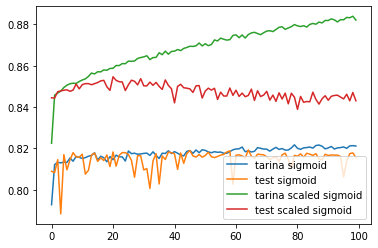

In [17]:
plt.plot(history.history['accuracy'], label = "tarina sigmoid")
plt.plot(history.history['val_accuracy'], label = "test sigmoid")

plt.plot(history_s.history['accuracy'], label = "tarina scaled sigmoid")
plt.plot(history_s.history['val_accuracy'], label = "test scaled sigmoid")

plt.legend()
plt.show()

# Zad

Porównaj fukcje aktywacji
* sigmoid
* tanh
* relu

# tanh

In [18]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_tanh = History()
model = Sequential()
model.add(Dense(100,activation="tanh",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="tanh"))
model.add(Dense(10,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_tanh])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 55us/step - loss: 0.3485 - accuracy: 0.8384 - val_loss: 0.3317 - val_accuracy: 0.8463
Epoch 2/100
30162/30162 [===========================

Epoch 50/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.2216 - accuracy: 0.8973 - val_loss: 0.3952 - val_accuracy: 0.8366
Epoch 51/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.2210 - accuracy: 0.8976 - val_loss: 0.3992 - val_accuracy: 0.8371
Epoch 52/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.2197 - accuracy: 0.8981 - val_loss: 0.3975 - val_accuracy: 0.8354
Epoch 53/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.2179 - accuracy: 0.8989 - val_loss: 0.4031 - val_accuracy: 0.8360
Epoch 54/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.2168 - accuracy: 0.8991 - val_loss: 0.4019 - val_accuracy: 0.8327
Epoch 55/100
30162/30162 [==============================] - 2s 51us/step - loss: 0.2152 - accuracy: 0.9004 - val_loss: 0.4058 - val_accuracy: 0.8344
Epoch 56/100
30162/30162 [==============================] - 2s 60us/step - loss: 0.2143 - accuracy: 0.8999

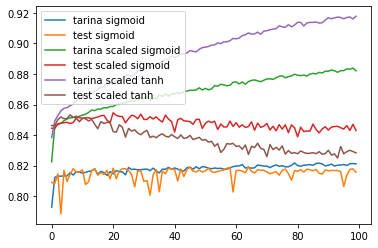

In [19]:
plt.plot(history.history['accuracy'], label = "tarina sigmoid")
plt.plot(history.history['val_accuracy'], label = "test sigmoid")

plt.plot(history_s.history['accuracy'], label = "tarina scaled sigmoid")
plt.plot(history_s.history['val_accuracy'], label = "test scaled sigmoid")

plt.plot(history_tanh.history['accuracy'], label = "tarina scaled tanh")
plt.plot(history_tanh.history['val_accuracy'], label = "test scaled tanh")

plt.legend()
plt.show()

# relu

In [23]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_relu = History()
model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_relu])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 56us/step - loss: 0.3476 - accuracy: 0.8368 - val_loss: 0.3275 - val_accuracy: 0.8481
Epoch 2/100
30162/30162 [===========================

Epoch 50/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.2334 - accuracy: 0.8902 - val_loss: 0.4378 - val_accuracy: 0.8420
Epoch 51/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.2328 - accuracy: 0.8906 - val_loss: 0.4341 - val_accuracy: 0.8382
Epoch 52/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.2323 - accuracy: 0.8878 - val_loss: 0.4422 - val_accuracy: 0.8361
Epoch 53/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.2316 - accuracy: 0.8886 - val_loss: 0.4379 - val_accuracy: 0.8339
Epoch 54/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.2306 - accuracy: 0.8896 - val_loss: 0.4533 - val_accuracy: 0.8361
Epoch 55/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.2294 - accuracy: 0.8896 - val_loss: 0.4591 - val_accuracy: 0.8414
Epoch 56/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.2284 - accuracy: 0.8909

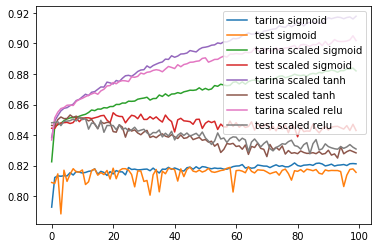

In [24]:
plt.plot(history.history['accuracy'], label = "tarina sigmoid")
plt.plot(history.history['val_accuracy'], label = "test sigmoid")

plt.plot(history_s.history['accuracy'], label = "tarina scaled sigmoid")
plt.plot(history_s.history['val_accuracy'], label = "test scaled sigmoid")

plt.plot(history_tanh.history['accuracy'], label = "tarina scaled tanh")
plt.plot(history_tanh.history['val_accuracy'], label = "test scaled tanh")

plt.plot(history_relu.history['accuracy'], label = "tarina scaled relu")
plt.plot(history_relu.history['val_accuracy'], label = "test scaled relu")

plt.legend()
plt.show()

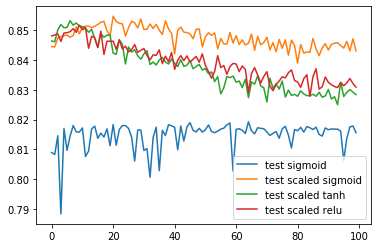

In [25]:
# plt.plot(history.history['accuracy'], label = "tarina sigmoid")
plt.plot(history.history['val_accuracy'], label = "test sigmoid")

# plt.plot(history_s.history['accuracy'], label = "tarina scaled sigmoid")
plt.plot(history_s.history['val_accuracy'], label = "test scaled sigmoid")

# plt.plot(history_tanh.history['accuracy'], label = "tarina scaled tanh")
plt.plot(history_tanh.history['val_accuracy'], label = "test scaled tanh")

# plt.plot(history_relu.history['accuracy'], label = "tarina scaled relu")
plt.plot(history_relu.history['val_accuracy'], label = "test scaled relu")

plt.legend()
plt.show()